# 2021 Intro. to Machine Learning 
## Final Project - Car Price Prediction


### 0816153 陳琮方

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=FutureWarning)

## Load Data

In [2]:
headers = [
    "symboling", "normalized-losses", "Car Manufacturer", "fuel-type", "aspiration", "num-of-doors", "body-style",
    "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
    "peak-rpm", "city-mpg", "highway-mpg", "price"
]

In [3]:
data_path = './Dataset/imports-85.data'
data_raw = pd.read_csv(data_path, header = None)

print(f'Dataset size = {data_raw.shape}')

data_raw.columns = headers
data_raw.head()

Dataset size = (205, 26)


,symboling,normalized-losses,Car Manufacturer,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
data = data_raw.dropna(subset = ["price"], axis = 0)
data = data.replace('?', np.nan)
data = data.dropna(axis = 0)

print(f'Dataset after missing target rows => {data.shape}')

Dataset after missing target rows => (159, 26)


In [5]:
data

,symboling,normalized-losses,Car Manufacturer,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

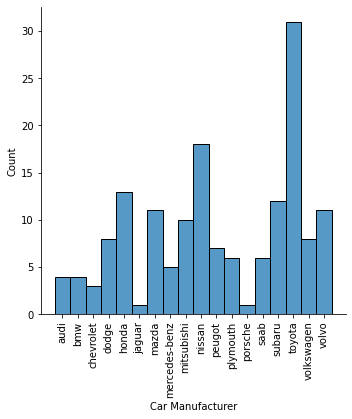

In [7]:
ax = sns.displot(x = 'Car Manufacturer', data = data)
fg = ax.set_xticklabels(rotation = 90)

fg.savefig('brand.png')

Price 𝜇  = 11445.729559748428, 𝜎 = 5859.343216339359


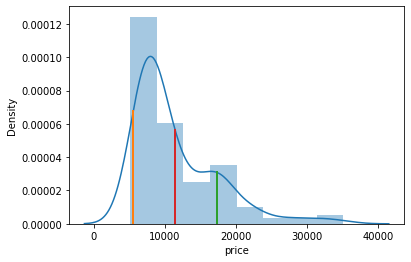

In [8]:
data["price"] = pd.to_numeric(data["price"])

now_data = data['price']

p = sns.distplot(x = now_data, bins = 8)
p.set(xlabel = 'price')

aver = np.average(now_data)
sigma = np.std(now_data)
print(f"Price 𝜇  = {aver}, 𝜎 = {sigma}")

low = aver - sigma
hi = aver + sigma

line = p.lines[0].get_data()
ipf = interp1d(x=line[0], y=line[1])

p.plot([low, low], [0, ipf(low)], linewidth = 2)
p.plot([hi, hi], [0, ipf(hi)], linewidth = 2)
p.plot([aver, aver], [0, ipf(aver)], linewidth = 2)

plt.savefig('Price_distribution.png')

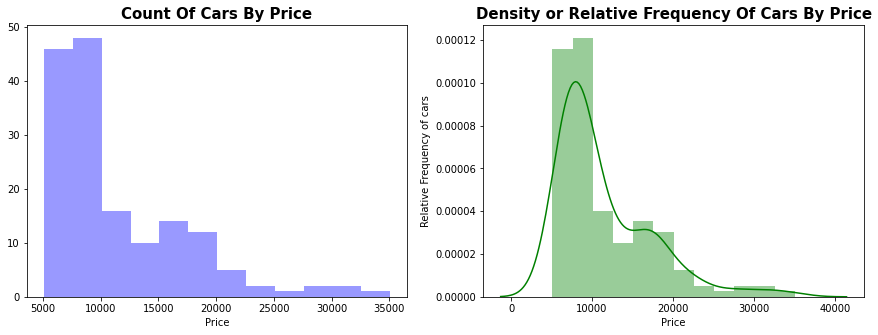

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.distplot(data['price'], kde = False, ax = ax[0], color = 'blue')
ax[0].set_xlabel('Price')
ax[0].set_title('Count Of Cars By Price',size = 15, weight = "bold")

sns.distplot(data['price'], kde = True, ax = ax[1], color = 'green')
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Relative Frequency of cars')
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size = 15, weight = "bold")

plt.savefig('Price_distribution_1.png')

In [10]:
data_numeric = data.select_dtypes(include = ['float64','int64'])
data_numeric = data_numeric.drop(['symboling'], axis = 1)

data_numeric.head()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
3,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
4,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450
6,105.8,192.7,71.4,55.7,2844,136,8.5,19,25,17710
8,105.8,192.7,71.4,55.9,3086,131,8.3,17,20,23875
10,101.2,176.8,64.8,54.3,2395,108,8.8,23,29,16430


<Figure size 1440x720 with 0 Axes>

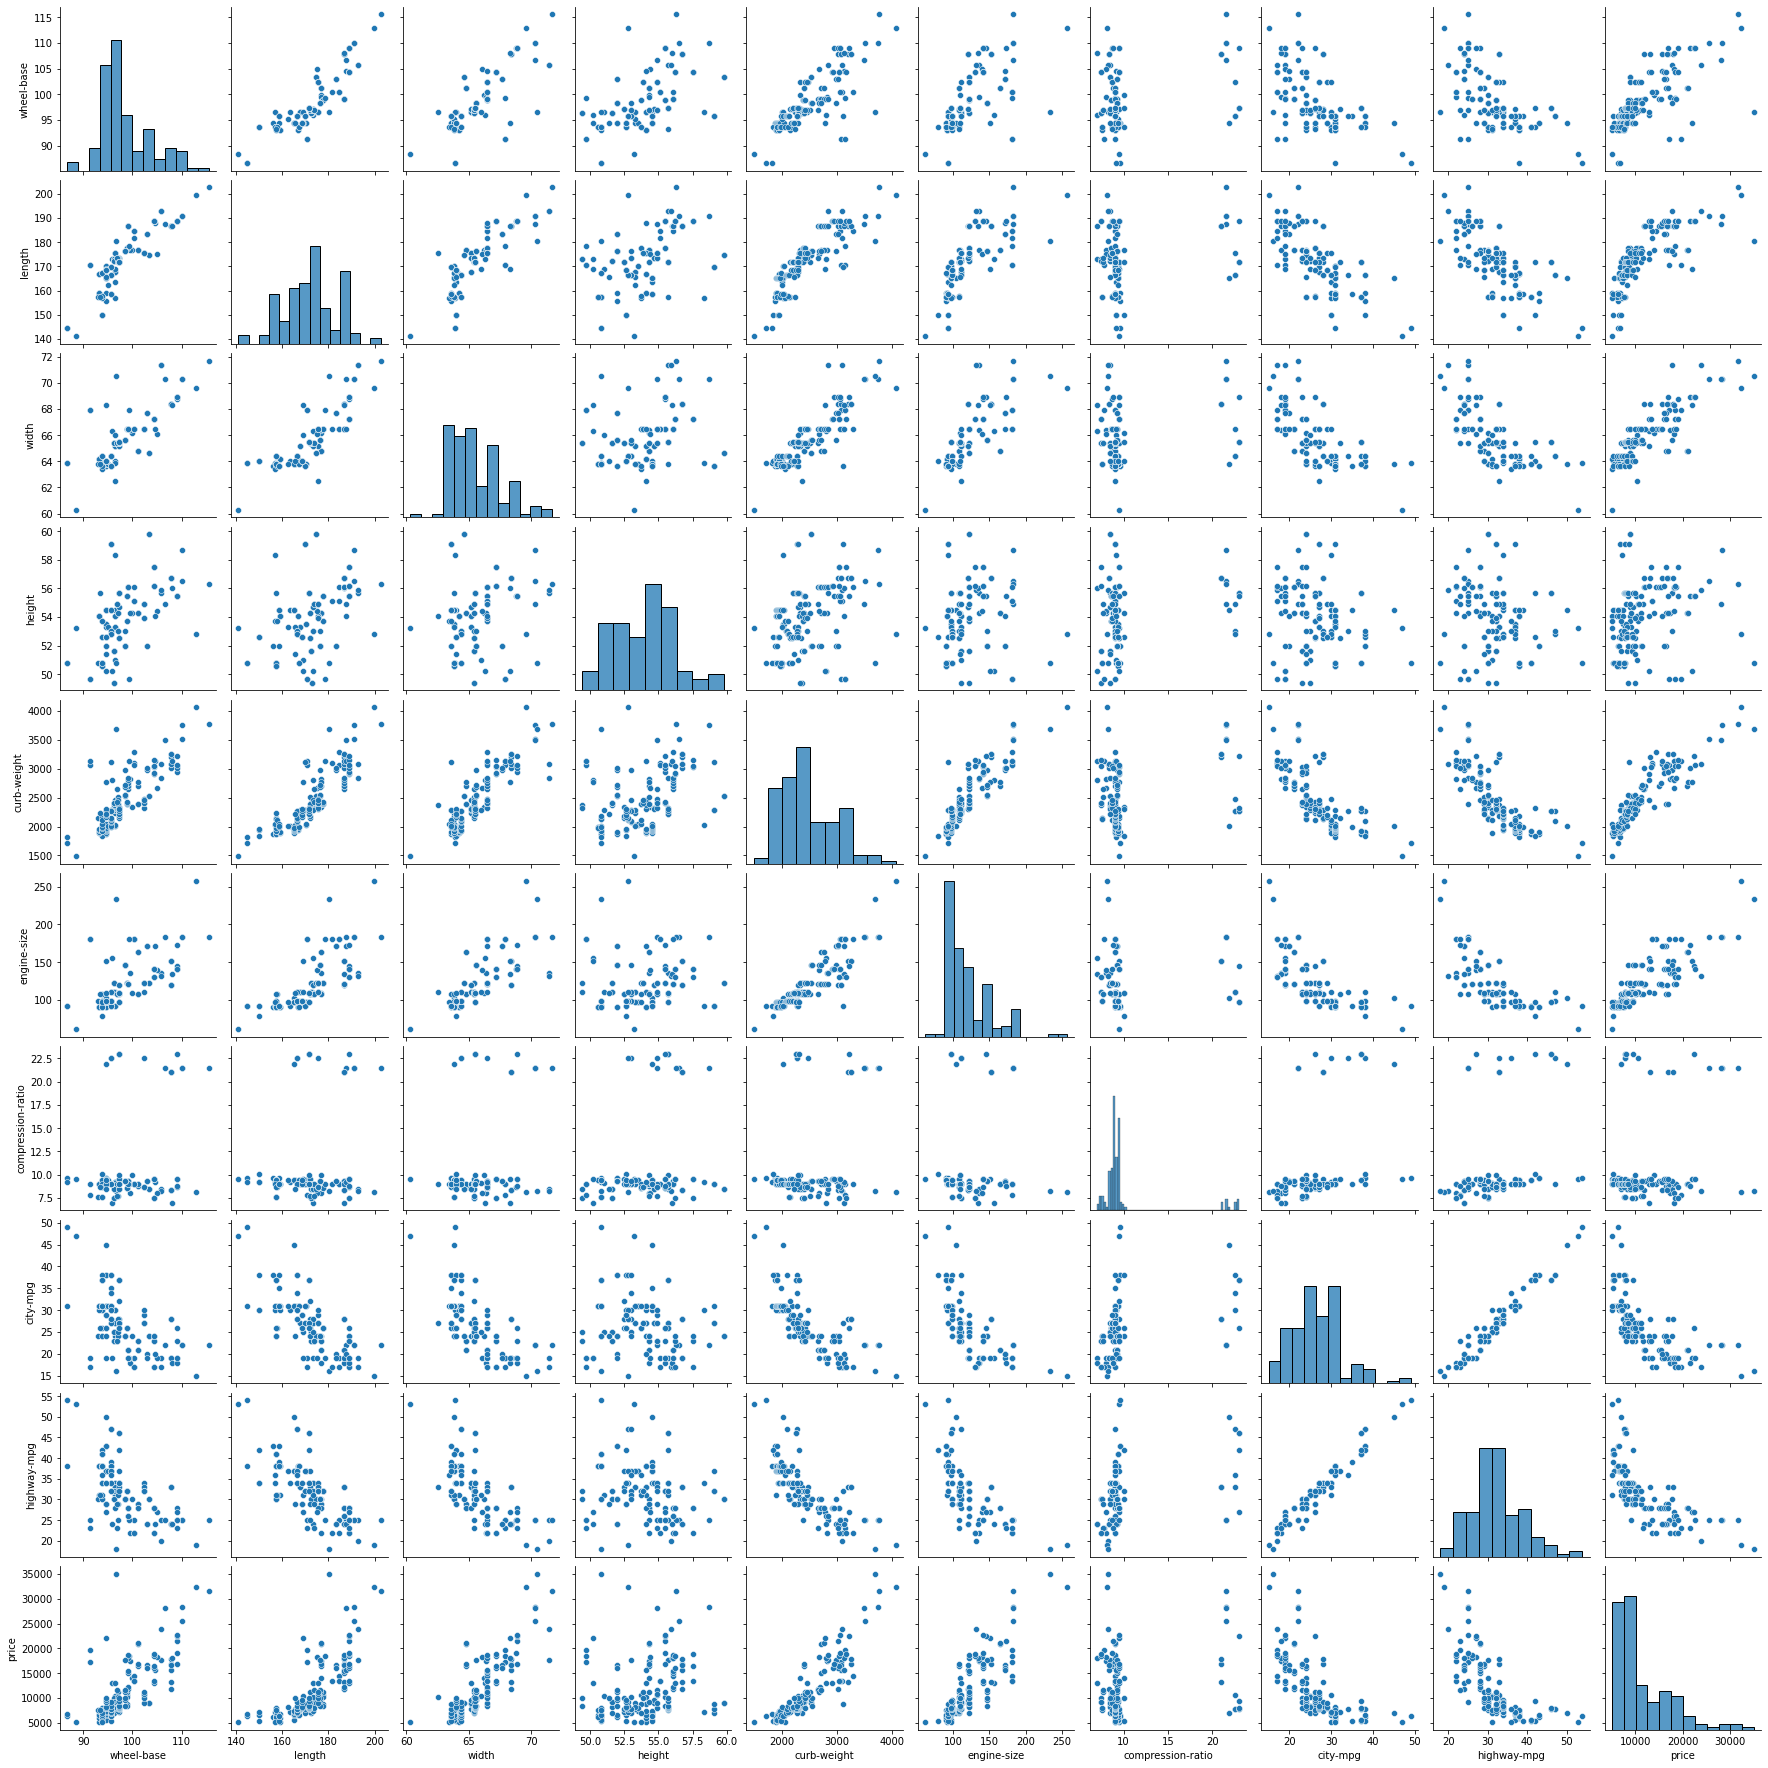

In [11]:
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)

plt.savefig('Numeric_relation.png')

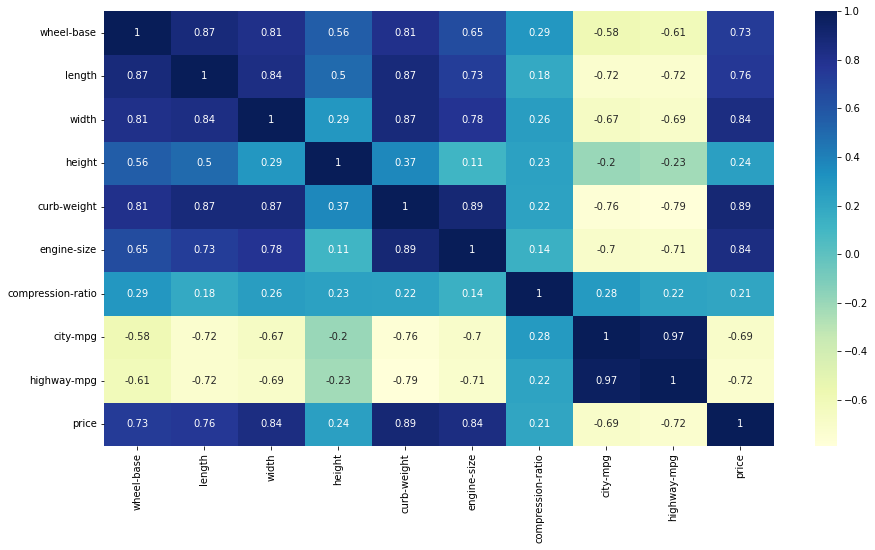

In [12]:
corr = data_numeric.corr()

plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, cmap = "YlGnBu")
plt.savefig('Relation_HM.png')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    object 
 2   Car Manufacturer   159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

## Preprocessing

In [14]:
TARGET_LABEL = 'price'

X_raw = data.drop(TARGET_LABEL, axis = 1)
Y_raw = data[TARGET_LABEL]

print(f'X size: {X_raw.shape}')

X size: (159, 25)


In [15]:
def toClass(y):
    yy = []
    for i in y:
        if i <= 10000: yy.append(0); continue;
        if i <= 15000: yy.append(1); continue;
        if i <= 20000: yy.append(2); continue;
        if i <= 25000: yy.append(3); continue;
        if i <= 30000: yy.append(4); continue;
        yy.append(5);
    return yy
            
Y = toClass(Y_raw.tolist())
Y = np.array(Y)

class_name = ["0 ~ 10000", "10001 ~ 15000", "15001 ~ 20000", "20001 ~ 25000", "25001 ~ 30000", "Above 30000"]

In [16]:
oneHot = [
    'Car Manufacturer', 'fuel-type', 'aspiration', "drive-wheels",  "engine-type",
    'num-of-doors', 'body-style', 'engine-location', 'fuel-system', "num-of-cylinders",
]

others = [
    "symboling", "normalized-losses", "wheel-base", 
    "length", "width", "height", "curb-weight",
    "engine-size", "bore", "stroke", "compression-ratio", "horsepower",
    "peak-rpm", "city-mpg", "highway-mpg"
]

In [17]:
from sklearn.preprocessing import OneHotEncoder

all_feat = oneHot + others

onehot_enc = OneHotEncoder(categories = 'auto')
onehot_enc.fit(X_raw[oneHot])

data_array = onehot_enc.transform(X_raw[oneHot]).toarray()
feat_names = onehot_enc.get_feature_names_out(oneHot)

data_frams = pd.DataFrame(data_array, index = X_raw.index, columns = feat_names, dtype=int)

X = pd.concat([X_raw.drop(columns = oneHot), data_frams], axis = 1)

print(f'Number of binary features: {len(oneHot)}')
print(f'Number of others features: {len(others)}')
print(f' => Sum of unique categorical: {len(feat_names)}')

print('\n=====================================')
print(f'X size after one-hot: {X.shape}')

Number of binary features: 10
Number of others features: 15
 => Sum of unique categorical: 49

X size after one-hot: (159, 64)


In [18]:
from sklearn import decomposition

PCA_DIMENTION = 10

def pca_analy(X, pca_dim = PCA_DIMENTION):
    pca = decomposition.PCA(n_components = pca_dim)
    pca.fit(X)
    
    return pca

In [19]:
from numpy import linalg as LA

def toPCA(now_X, pca = None, dim = PCA_DIMENTION):
    drp_X = now_X.drop(feat_names, axis = 1)
    now_X = now_X[feat_names]
    
    if pca == None:
        pca = pca_analy(drp_X, dim)
    
    now_X = np.concatenate([now_X.to_numpy(), pca.transform(drp_X)], axis = 1)
    
    return now_X, pca

In [20]:
X

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,1,0,0,0,1,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,1,0,0,1,0,0,0
6,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,...,0,0,0,1,0,0,1,0,0,0
8,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,...,0,0,0,1,0,0,1,0,0,0
10,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,1,0,0,0,1,0,0
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,1,0,0,0,1,0,0
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,1,0,0,0,0,1,0
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,1,0,0,0,0,0,0,1,0


## Model Construction

In [21]:
def print_heatmap(mat, title):
    sns.heatmap(mat, square= True, annot=True, cbar= True)
    plt.xlabel("Predicted value")
    plt.ylabel("True value")
    plt.title(f"{title}")
    plt.savefig(f'{title}_CM.png')
    plt.show()

In [22]:
def getAve(result, title = ""):
    n = len(result)
    
    for i in range(1, len(result)):
        result[0]['Accuracy'] += result[i]['Accuracy']
        result[0]['Confusion Matrix'] += result[i]['Confusion Matrix']
        result[0]['Recall'] += result[i]['Recall']
        result[0]['Precision'] += result[i]['Precision']
        
    result[0]['Accuracy'] /= 3
    result[0]['Confusion Matrix'] = np.round(np.divide(result[0]['Confusion Matrix'],3), 2)
    result[0]['Recall'] /= 3
    result[0]['Precision'] /= 3
    
    result[0]['Accuracy'] = np.round(result[0]['Accuracy'], 4)
    result[0]['Recall'] = np.round(result[0]['Recall'], 4)
    result[0]['Precision'] = np.round(result[0]['Precision'], 4)

    try:
        print_heatmap(result[0]['Confusion Matrix'], title)
    except:
        None
    return result[0]

In [23]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score

def getResult(y_test, y_pred):
    ret = {}

    ret['Accuracy'] = np.round(round(accuracy_score(y_test, y_pred), 4) * 100, 2)
    ret['Recall'] = np.round(recall_score(y_test, y_pred, average='macro'), 2)
    ret['Precision'] = np.round(precision_score(y_test, y_pred, average='macro'), 2)
    ret['Confusion Matrix'] = confusion_matrix(y_test, y_pred, labels = [0, 1, 2, 3, 4, 5])
    return ret

In [24]:
# Looking for best PCA Dimention
from sklearn import model_selection

def bestDimention(model, title = ""):
    X_train, X_test, Y_train, Y_test = \
        model_selection.train_test_split(X, Y, test_size = 0.20, shuffle = True, random_state = 50)

    MIN_DIM = 5
    MAX_DIM = X.shape[1] - len(feat_names)

    tra_acc = []
    tst_acc = []
    idx = []

    for i in range(MIN_DIM, MAX_DIM + 1):
        idx.append(i)
        
        XX_train, pca = toPCA(X_train, dim = i)
        XX_test       = toPCA(X_test, pca)[0]

        model.fit(XX_train, Y_train)

        tmp = {}
        y_pred = clf.predict(XX_train)
        tra_acc.append(np.round(round(accuracy_score(Y_train, y_pred), 4) * 100, 2))

        y_pred = clf.predict(XX_test)
        tst_acc.append(np.round(round(accuracy_score(Y_test, y_pred), 4) * 100, 2))


    df = pd.DataFrame(list(zip(tra_acc, tst_acc)), columns = ['Trainning', 'Testing'])
    ax = sns.lineplot(data = df)
    ax.set_xticklabels(idx)
    plt.title(f"{title} Looking for best Dimention for PCA")
    plt.savefig(f'{title}_Dim.png')
    plt.show()

### Decision Tree

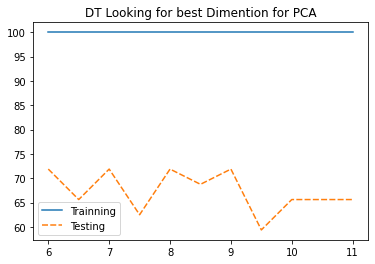

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0)
bestDimention(clf, "DT")

In [26]:
def decisionTree(X, Y, pca = False, title = ""):
    kf = model_selection.KFold(n_splits = 3, shuffle = True)
    
    result = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        if pca == True:
            X_train, pca = toPCA(X_train, dim = 9)
            X_test       = toPCA(X_test, pca)[0]
        
        clf = DecisionTreeClassifier(random_state = 0)
        clf.fit(X_train, Y_train)

        y_pred = clf.predict(X_test)
        ret = getResult(Y_test, y_pred)
        result.append(ret)
    
    return getAve(result, title)

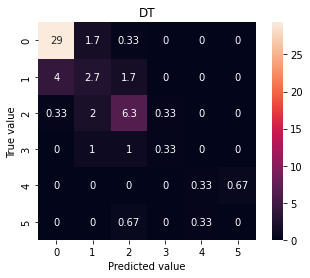

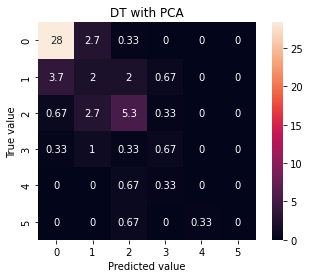

,Accuracy,Recall,Precision
Decision Tree,73.5833,0.4133,0.3933
Decision Tree with PCA,68.5533,0.4400,0.4367


In [27]:
result = {}

result['Decision Tree'] = decisionTree(X, Y, title = "DT")
result['Decision Tree with PCA'] = decisionTree(X, Y, pca = True, title = "DT with PCA")

df = pd.DataFrame.from_dict(result, orient = 'index')
df = df.drop(['Confusion Matrix'], axis = 1)
df

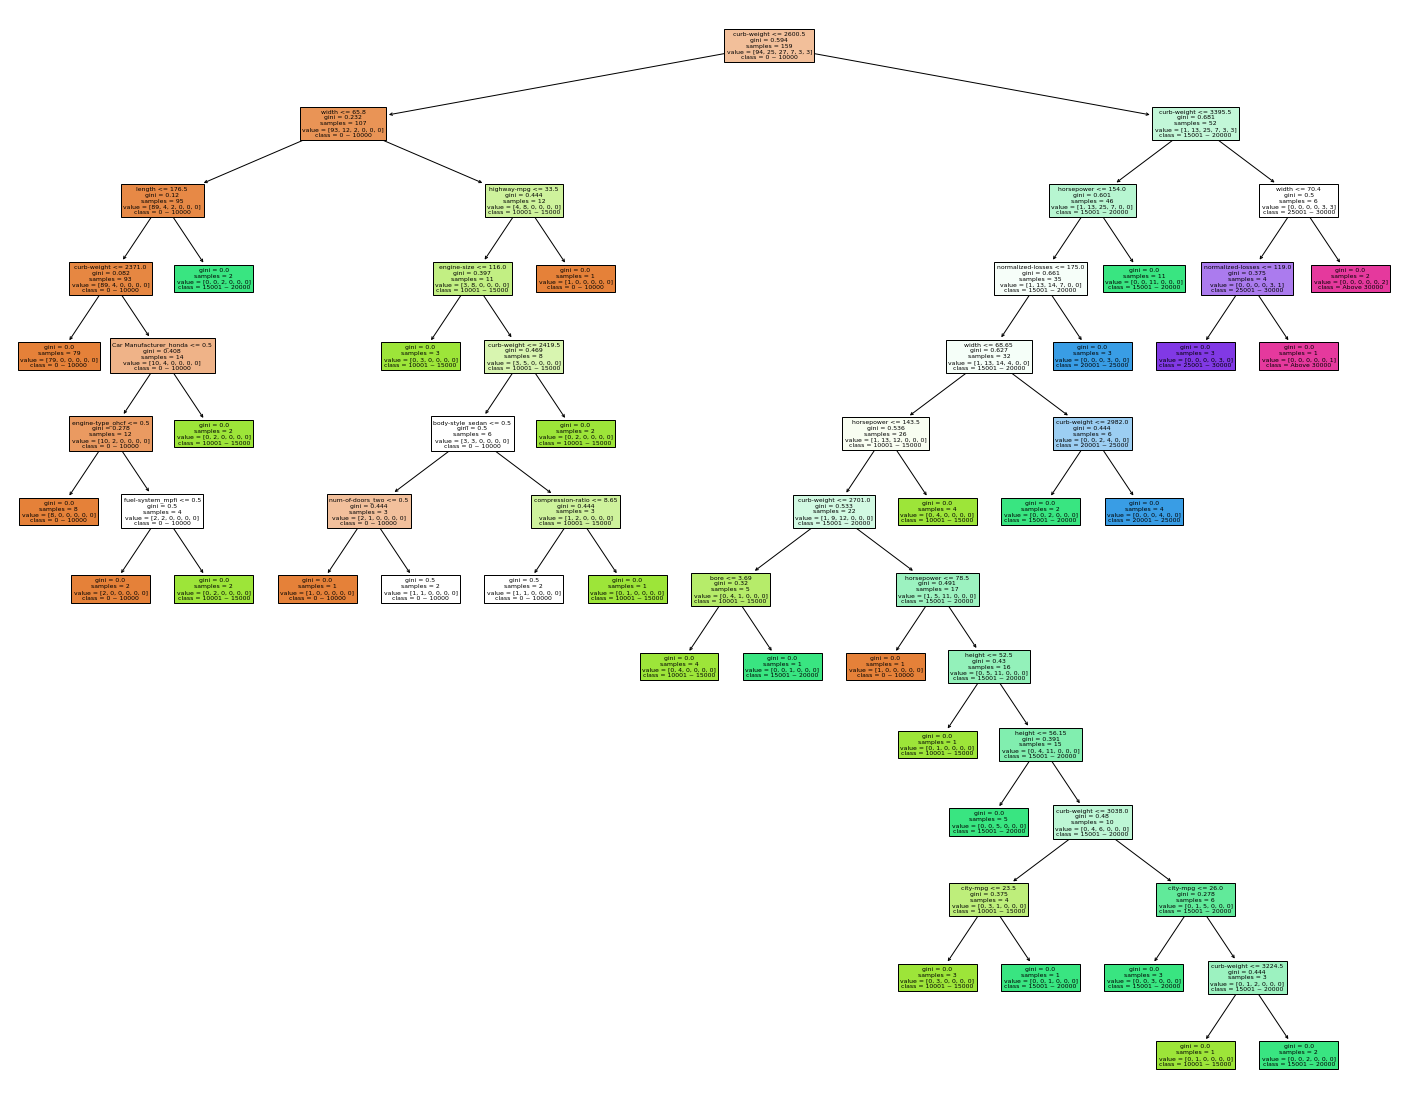

In [28]:
from sklearn import tree

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X, Y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names= X.columns, class_names = class_name, filled=True)

plt.savefig(f'DT_Tree.png')

### Random Forest

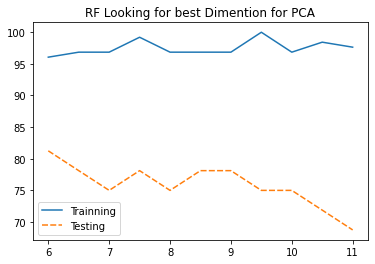

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10, max_depth = None, random_state = 0)
bestDimention(clf, "RF")

In [30]:
def randomForest(X, Y, max_dep = None, n_tree = 10, pca = False, title = ""):
    kf = model_selection.KFold(n_splits=3, shuffle = True)
    
    result = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        if pca == True:
            X_train, pca = toPCA(X_train, dim = 6)
            X_test       = toPCA(X_test, pca)[0]
        
        clf = RandomForestClassifier(n_estimators=n_tree, max_depth=max_dep, random_state=0)
        clf.fit(X_train, Y_train)
    
        y_pred = clf.predict(X_test)
        ret = getResult(Y_test, y_pred)
        result.append(ret)
    
    return getAve(result, title)

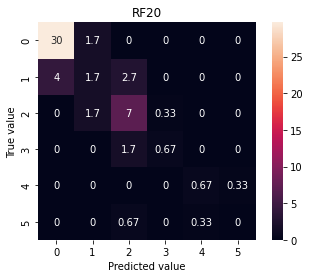

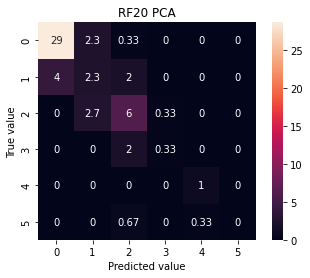

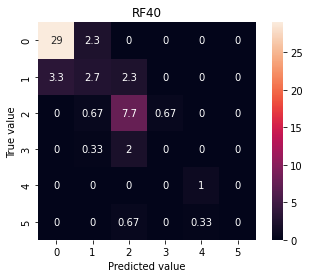

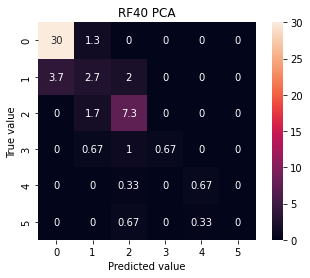

,Accuracy,Recall,Precision
RF-20 Binary,74.8433,0.5300,0.4900
RF-20 Binary PCA,72.3267,0.5600,0.5500
RF-40 Binary,76.1033,0.5700,0.4967
RF-40 Binary PCA,77.9867,0.5367,0.6100


In [31]:
result = {}

result['RF-20 Binary'] = \
    randomForest(X, Y, max_dep = None, n_tree = 20, title = 'RF20')
result['RF-20 Binary PCA'] = \
    randomForest(X, Y, max_dep = None, n_tree = 20, pca = True, title = 'RF20 PCA')

result['RF-40 Binary'] = \
    randomForest(X, Y, max_dep = None, n_tree = 40, title = 'RF40')
result['RF-40 Binary PCA'] = \
    randomForest(X, Y, max_dep = None, n_tree = 40, pca = True, title = 'RF40 PCA')

df = pd.DataFrame.from_dict(result, orient = 'index')
df = df.drop(['Confusion Matrix'], axis = 1)
df

### Logistic Regression

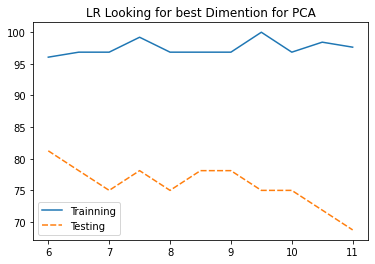

In [32]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
bestDimention(clf, "LR")

## 

In [33]:
def LogisticRegressionModel(X, Y, pca = False, title = ""):
    kf = model_selection.KFold(n_splits=3, shuffle = True)
    
    result = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        if pca == True:
            X_train, pca = toPCA(X_train, dim = 10)
            X_test       = toPCA(X_test, pca)[0]
        
        reg = LogisticRegression()
        reg.fit(X_train, Y_train)
    
        y_pred = reg.predict(X_test)
        ret = getResult(Y_test, y_pred)
        result.append(ret)
    
    return getAve(result, title)

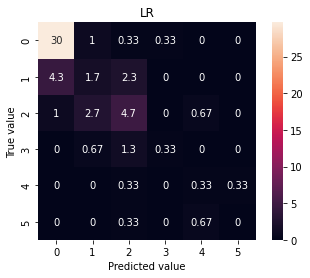

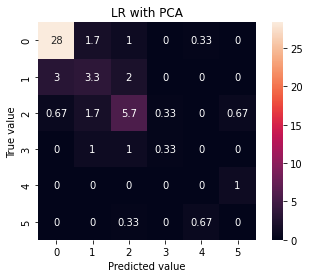

,Accuracy,Recall,Precision
Logistic Regression,69.1833,0.3667,0.3133
Logistic Regression with PCA,71.0667,0.3667,0.3733


In [34]:
result = {}

result['Logistic Regression'] = \
    LogisticRegressionModel(X, Y, pca = False, title = 'LR')
result['Logistic Regression with PCA'] = \
    LogisticRegressionModel(X, Y, pca = True, title = 'LR with PCA')

df = pd.DataFrame.from_dict(result, orient = 'index')
df = df.drop(['Confusion Matrix'], axis = 1)
df